# GameScope: Analyzing Sales and Reddit Posts in the Video Game Industry

### Group Members: Yixiang Cheng; Naihuan Jing; Zifeng Xu; Kefan Yu

###  Milestone 1: Frame your analysis and EDA

## Introduction

#### In the ever-evolving landscape of digital entertainment, video games have become a cultural phenomenon, pushing the boundaries of interactive storytelling, competitive sports, and social engagement. Our project, titled "GameScope: Analyzing Sales and Sentiments in the Video Game Industry", aims to harness the vast repository of video game sales data alongside rich, community-driven discussions from Reddit to uncover trends, predict future market shifts, and understand the pulse of the gaming community. By leveraging a combination of exploratory data analysis, machine learning algorithms, and natural language processing (NLP), we seek to reveal the intricacies of video game popularity, genre dominance, and community sentiment. Through this multifaceted approach, "GameScope" will provide valuable insights into the best-selling games and the most engaging titles, identify potential influencers, and offer strategic recommendations for stakeholders in the gaming industry.

## Topics

### Exploratory

1. **Business Goal**: Among the historical video games sales, determine the best-selling games and its genre/publisher/platforms etc..
([external dataset](https://www.kaggle.com/datasets/gregorut/videogamesales))

    **Technical proposal**: Group sales data by game genre, publisher, platforms; rank and visualize the total sales using bar charts or pie charts.

2. **Business Goal**: Among the video games discussed on Reddit, determine the most popular games and their popularity over months.

    **Technical proposal**: Merge the subreddits with different game categories into one dataframe. Conduct counts of which posts mentioning these games grouping by the games names. Present the results in forms of table and bar chart of top K (5 <= K <= 10) most popular games on Reddit. Plot time series graphs over past 5 years

3. **Business Goal**: Determine if there's a correlation between video game sales and the volume of Reddit discussions + between sales and sentiment scores on Reddit.

    **Technical Proposal**: Compare the number of posts and comments for each video game with its sales figures. Plot a scatter plot to visualize any correlation between discussion volume and sales. Correlate average sentiment scores from Reddit discussions with sales figures for each game. Use scatter plots or heat maps to visualize the relationship.

### Machine learning:

4. **Business Goal**: Predict the potential popularity of different genre of games, thus to find out which type of games will dominate the game market in recent futures 

    **Technical proposal**: Use time series arima/ann model to fit the past 5 years popularity for each game, and make predictions by regression for future market share for each type of games.

5. **Business Goal**: Classify games into different genres in their sale data
([external dataset](https://www.kaggle.com/datasets/gregorut/videogamesales))

    **Technical proposal**: Use the external data with genre labels to train a supervised classification model. Test and validate the model's classification accuracy on test data and evaluate the model by accuracy metric.

6. **Business Goal**: Classify user posts into categories like "Bug Reports", "Gameplay Discussion", "Lore Discussion", etc., for more efficient community management.

    **Technical proposal**: Create labeled data by manually categorizing a subset of posts. Use this data to train a supervised classification model. Test and validate the model's classification accuracy on unseen data, refining the model as necessary.

7. **Business Goal**: Identify potential influencers or major contributors in the subreddit communities to form partnerships or community events.

    **Technical proposal**: Extract features from user data, such as post frequency, average upvotes, etc. Train a clustering algorithm (like K-Means) to segment users. Identify clusters with high engagement metrics as potential influencers.

### NLP

8. **Business Goal**: Discover which video games have the most positive community engagement and interactions.

    **Technical proposal**: Evaluate sentiment scores of comments and posts within each game's subreddit. Calculate average sentiment scores, considering both post sentiment and comment sentiment. Rank games based on their average sentiment scores to establish those with the most positive community interactions.

9. **Business Goal**: Search the keywords that users rate the game with positive/negative feedback. Among them, understand the most influential factors that encourage players to purchase in-game items or features. 

    **Technical proposal**: Identify posts discussing purchases, in-game economy, or item acquisition. Use topic modeling to derive key themes from these discussions. Correlate the themes with in-game events, sales, or updates to pinpoint major drivers of in-game spending.

10. **Business Goal**: Find the key points that players are most satisfied/unsatisfied for each game .  

    **Technical proposal**: Identify posts with games, filtering them with nlp methods to derive the positive and negative score on those posts. Giving weights for posts depends on their score, and deriving the top key points/aspects that shows strongest positive/negative attitudes.

11. **Business Goal**: Explore the impact of eSports events on general player sentiment and engagement within the community.

    **Technical proposal**: Identify time frames of major eSports events related to the games. Analyze post and comment frequencies during these periods. Apply sentiment analysis to determine if eSports events lead to increased positivity or negativity within the community. 

## EDA

#### The exploratory data analysis (EDA) segment of "GameScope" serves as the foundation of our project, where we delve into the rich historical sales data of video games and the vibrant conversations held within Reddit's gaming communities. 

#### The EDA phase is critical, as it not only provides a snapshot of the current gaming landscape but also sets the stage for predictive and sentiment analysis, enabling us to correlate discussion volume and sentiment with sales performance. This comprehensive examination will give us a robust platform from which to draw insights and inform subsequent phases of Machine Learning and NLP application.

### Topic 1

#### Here, we will meticulously sift through external datasets to discern patterns in video game sales across different genres, platforms, and publishers. By ranking and visualizing this data, we aim to unearth the key drivers behind the success of top-selling titles. 

The data is collected from [kaggle: Video Game Sales -- A comprehensive video game sales dataset of over 54,000 titles](https://www.kaggle.com/datasets/mikegillotti/video-game-sales/data).

Three external data files used in this EDA part:

    1. "video game sales all platforms.csv" - Sales data for combined platforms of individual games.

    2. "video game sales series.csv" - Sales data for entire game series.

    3. "video game sales titles.csv" - Individual video game titles' sales data.

We'll explore each dataset to understand its structure and then proceed to create complex and professional visualizations to analyze the sales data.

#### Data Preparation

First, let's load the data from these CSV files.

In [1]:
import pandas as pd

# Load each of the CSV files into a pandas DataFrame
all_platforms_sales_df = pd.read_csv('../../data/csv/video game sales all platforms.csv')
series_sales_df = pd.read_csv('../../data/csv/video game sales series.csv')
titles_sales_df = pd.read_csv('../../data/csv/video game sales titles.csv')

# Display the first few rows of each DataFrame to understand their structure
all_platforms_sales_df.head()

,Rank,Title,Publisher,Developer,Total Sales,Release Date,Last Update,Genre
0,1,Minecraft,Mojang,Mojang AB,238000000.0,11/18/2011,10/8/2020,Action-Adventure
1,2,Grand Theft Auto V,Rockstar Games,Rockstar North,180000000.0,9/17/2013,10/8/2020,Action-Adventure
2,3,PlayerUnknown's Battlegrounds,PUBG Corporation,PUBG Corporation,70000000.0,12/17/2017,10/24/2020,Shooter
3,4,The Elder Scrolls V: Skyrim,Bethesda Softworks,Bethesda Game Studios,60000000.0,11/10/2011,10/27/2020,Role-Playing
4,5,Red Dead Redemption 2,Rockstar Games,Rockstar Studios,53000000.0,10/26/2018,10/8/2020,Action-Adventure


In [43]:
series_sales_df.head()

,Rank,Title,Publisher,Developer,Total Sales,Release Date,Last Update,Genre
0,1,Tetris,The Tetris Company,Alexey Pajitnov,496400000.0,1/1/1988,2/27/2020,Puzzle
1,2,Pokemon,Nintendo,Game Freak,480660000.0,9/28/1998,2/3/2020,Role-Playing
2,3,Super Mario,Nintendo,Nintendo,401830000.0,7/20/1983,2/20/2020,Platform
3,4,Grand Theft Auto,Rockstar Games,Rockstar North,400000000.0,3/27/1998,2/3/2020,Action-Adventure
4,5,Call of Duty,Activision,Infinity Ward,400000000.0,10/29/2003,2/3/2020,Shooter


In [44]:
titles_sales_df.head()

,Rank,Title,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,Genre
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82900000.0,NaN,NaN,NaN,NaN,11/19/2006,NaN,Sports
1,2,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,NaN,9.3,NaN,55460000.0,NaN,NaN,NaN,NaN,4/28/2017,11/19/2018,Racing
2,3,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,8.0,NaN,NaN,42790000.0,NaN,NaN,NaN,NaN,3/20/2020,4/11/2020,Simulation
3,4,Super Mario Bros.,NES,Nintendo,Nintendo EAD,NaN,10.0,8.2,40240000.0,NaN,NaN,NaN,NaN,10/18/1985,NaN,Platform
4,5,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,NaN,NaN,NaN,40000000.0,NaN,NaN,NaN,NaN,8/21/2012,3/26/2019,Shooter


Here is an overview of the datasets we have:

**All Platforms Sales Data (all_platforms_sales_df):**

    Rank: Ranking based on total sales
    Title: Name of the game
    Publisher: Company that published the game
    Developer: Company that developed the game
    Total Sales: Total sales in units
    Release Date: Date when the game was released
    Last Update: Last date when the sales data was updated
    Genre: Genre of the game
    Series Sales Data (series_sales_df):

Similar to the all platforms sales data but for entire game series rather than individual titles.

**Titles Sales Data (titles_sales_df):**

    Rank: Ranking based on total sales
    Title: Name of the game
    Console: Platform on which the game was released
    Publisher: Company that published the game
    Developer: Company that developed the game
    VGChartz Score: Score from VGChartz (not available for all entries)
    Critic Score: Score from critics (not available for all entries)
    User Score: Score from users (not available for all entries)
    Total Sales: Total sales in units
    NA Sales: Sales in North America (not available for all entries)
    PAL Sales: Sales in PAL region (not available for all entries)
    Japan Sales: Sales in Japan (not available for all entries)
    Other Sales: Sales in other regions (not available for all entries)
    Release Date: Date when the game was released
    Last Update: Last date when the sales data was updated
    Genre: Genre of the game

With these structures in mind, we can now proceed to analyze and visualize the data. Since the goal is to create advanced, interactive visualizations, we can use libraries such as Plotly to generate dynamic plots.

To begin, we will:

Aggregate sales data where necessary.

Identify the top-selling games, genres, publishers, and platforms.

Create interactive visualizations for these aggregated data points.

Let's start by summarizing the top-selling games, genres, and publishers from each dataset.​

In [2]:
# Function to summarize the top-selling games, genres, and publishers
def summarize_sales_data(df):
    # Top-selling games
    top_games = df.groupby('Title')['Total Sales'].sum().sort_values(ascending=False).head(10)
    
    # Top-selling genres
    top_genres = df.groupby('Genre')['Total Sales'].sum().sort_values(ascending=False).head(10)
    
    # Top-selling publishers
    top_publishers = df.groupby('Publisher')['Total Sales'].sum().sort_values(ascending=False).head(10)
    
    return top_games, top_genres, top_publishers

# Summarize for all platforms
top_games_all, top_genres_all, top_publishers_all = summarize_sales_data(all_platforms_sales_df)

# Summarize for series
top_games_series, top_genres_series, top_publishers_series = summarize_sales_data(series_sales_df)

# Summarize for titles (we need to group by Title and Console since the same title can be on different consoles)
titles_sales_df['Title_Console'] = titles_sales_df['Title'] + " (" + titles_sales_df['Console'] + ")"
top_games_titles, top_genres_titles, top_publishers_titles = summarize_sales_data(titles_sales_df)

**Top Games Sales**

| Top Games All Platforms                   | Top Games Series                         | Top Games Titles                                   |
|-------------------------------------------|------------------------------------------|----------------------------------------------------|
| Minecraft (238,000,000)                   | Tetris (496,400,000)                     | Wii Sports (Wii) (82,900,000)                      |
| Grand Theft Auto V (180,000,000)          | Pokemon (480,660,000)                    | Mario Kart 8 Deluxe (NS) (55,460,000)              |
| PlayerUnknown's Battlegrounds (70,000,000)| Super Mario (401,830,000)                | Animal Crossing: New Horizons (NS) (42,790,000)    |

**Top Genres Sales**

| Top Genres All Platforms                  | Top Genres Series                        | Top Genres Titles                                  |
|-------------------------------------------|------------------------------------------|----------------------------------------------------|
| Action-Adventure (1,368,110,000)          | Puzzle (1,034,400,000)                   | Action (1,574,360,000)                             |
| Shooter (638,200,000)                     | Role-Playing (1,023,030,000)             | Sports (1,471,590,000)                             |
| Role-Playing (600,420,000)                | Action-Adventure (995,000,000)           | Shooter (1,445,340,000)                            |

**Top Publishers Sales**

| Top Publishers All Platforms              | Top Publishers Series                    | Top Publishers Titles                              |
|-------------------------------------------|------------------------------------------|----------------------------------------------------|
| Rockstar Games (357,500,000)              | Nintendo (2,023,030,000)                 | Nintendo (2,389,720,000)                           |
| Electronic Arts (317,960,000)             | Electronic Arts (748,940,000)            | Activision (728,000,000)                           |
| Capcom (288,900,000)                      | Rockstar Games (506,700,000)             | Electronic Arts (695,070,000)                      |

Let's summarize the key points:

    All Platforms Sales Data
        Top Games: Minecraft and Grand Theft Auto V are the top-selling titles.
        Top Genres: Action-Adventure and Shooter genres have the highest total sales.
        Top Publishers: Rockstar Games and Electronic Arts are among the top publishers.

    Series Sales Data
        Top Series: Tetris and Pokemon are the top-selling game series.
        Top Genres: Action-Adventure and Role-Playing genres lead the series sales.
        Top Publishers: Nintendo has the highest sales as a publisher for game series.

    Titles Sales Data
        Titles: Wii Sports and Grand Theft Auto V lead the sales on specific platforms.
        Top Genres: Action and Sports genres are the most successful.
        Top Publishers: Nintendo is the dominant publisher for title sales.

### Data Visualization

Next, we will create interactive visualizations to better understand these summaries. We'll produce plots for each dataset that display the top games, genres, and publishers. These will be interactive plots, allowing us to hover over elements to see additional details or to filter and drill down into the data.

Let's start by visualizing the top-selling games from the "All Platforms" dataset. We'll create an interactive bar chart for this.​

In [3]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import plotly.express as px
from plotly.subplots import make_subplots


# Top 10 games from the all platforms data
top_games_all_df = top_games_all.reset_index()

# Ensure the 'Title_Console' column exists
titles_sales_df['Title_Console'] = titles_sales_df['Title'] + " (" + titles_sales_df['Console'] + ")"

# We will re-summarize the top games titles now that we have the 'Title_Console' column.
top_games_titles = titles_sales_df.groupby('Title_Console')['Total Sales'].sum().sort_values(ascending=False).head(10)
top_games_titles_df = top_games_titles.reset_index()

# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=(
    'Top 10 Best-Selling Games Across All Platforms',
    'Top 10 Best-Selling Game Titles Within One Specific Platforms'
))

# Add the first bar chart to the first column
fig.add_trace(
    px.bar(
        top_games_all_df,
        x='Title',
        y='Total Sales',
        labels={'Total Sales': 'Total Sales (in units)'},
        color='Total Sales',
        color_continuous_scale=px.colors.sequential.Viridis
    ).data[0],
    row=1, col=1
)

# Add the second bar chart to the second column
fig.add_trace(
    px.bar(
        top_games_titles_df,
        x='Title_Console',
        y='Total Sales',
        labels={'Total Sales': 'Total Sales (in units)', 'Title_Console': 'Game Title (Platform)'},
        color='Total Sales',
        color_continuous_scale=px.colors.sequential.Cividis
    ).data[0],
    row=1, col=2
)

# Update the layout for better readability
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis2_tickangle=-45,
    title_x=0.5,
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False
)

# Save the interactive bar chart as an HTML file
fig_file_path = '../../img/combined_games_chart.html'
fig.write_html(fig_file_path)

# Show the figure
fig.show()

The interactive bar chart for the top 10 best-selling games across all platforms and specific platform has been created and saved as an HTML file.

The two bar charts display the top-selling video games, with the left chart showing sales across all platforms, and the right chart focusing on the best-selling titles on specific platforms. The left chart has 'Minecraft' and 'Grand Theft Auto V' leading by a significant margin, indicating their success across multiple gaming platforms. The right chart seems to list games that are best-sellers on a single specific platform, like 'Wii Sports' for the Wii and 'Mario Kart 8 Deluxe' for the Nintendo Switch.

Each bar's length and color correspond to the total sales, as indicated by the legend on the right, which also scales up to 200 million units for the first chart and 80 million for the second chart. These charts highlight individual game titles that have achieved high sales volumes, either across all platforms or within a specific platform.

Next, we will create a sunburst chart to display the sales distribution across different genres and publishers. This will provide a hierarchical view of which genres are dominating and which publishers are leading within those genres.​

In [49]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# Create a DataFrame that aggregates sales by genre and publisher for the sunburst chart
genre_publisher_sales_df = all_platforms_sales_df.groupby(['Genre', 'Publisher'])['Total Sales'].sum().reset_index()

# Before creating the sunburst chart, we need to ensure there are no zero or null total sales values
# as they can cause issues with the chart generation.
cleaned_genre_publisher_sales_df = genre_publisher_sales_df[
    genre_publisher_sales_df['Total Sales'] > 0
].dropna(subset=['Total Sales'])

# Now, let's try creating the sunburst chart again
fig_sunburst_genre_publisher = px.sunburst(
    cleaned_genre_publisher_sales_df,
    path=['Genre', 'Publisher'],
    values='Total Sales',
    color='Total Sales',
    color_continuous_scale='Oryel',
    title='Sunburst Chart of Sales Distribution by Genre and Publisher'
)

# Enhance the layout for better readability
fig_sunburst_genre_publisher.update_layout(
    coloraxis_colorbar=dict(title="Total Sales (in units)"),
    margin=dict(t=50, l=25, r=25, b=25)  # Reduce plot margins
)

# Show the figure
fig_sunburst_genre_publisher.show()

# Save the interactive sunburst chart for genre and publisher sales as an HTML file
fig_sunburst_genre_publisher_file_path = '../../img/sunburst_genre_publisher_sales.html'
fig_sunburst_genre_publisher.write_html(fig_sunburst_genre_publisher_file_path)


The sunburst chart for sales distribution by genre and publisher, with cleaned data to avoid zero sales values, has been successfully created and saved. 

The chart is divided into several layers, each representing a level of the hierarchy. The innermost ring represents the genre of games, which includes categories like Action-Adventure, Shooter, Role-Playing, etc. Moving outward, the next layer shows the names of video game publishers like Activision, Ubisoft, Electronic Arts, and others. Each segment's size corresponds to total sales in units, which are indicated by the color gradient in the legend on the right, ranging from 0 to 300 million units. The darker the color, the higher the sales volume.

This chart provides a comprehensive overview of which genres and publishers dominate the market in terms of sales.

### Topic 2

#### In this section, we focus on the Reddit data of top-10 popular games filtered and counted from the total subreddit data.

Two Summary tables used in this EDA part:

    1. "top_10_pop_games.csv" - Total count of top-10 popular games.

    2. "top_10_pop_games_month.csv" - Count of top-10 popular games in each month from 2021 to 2023.

These two tables are generated from "project_starter_script.py", in which we read in the whole reddit data with read.parquet and filter it to top-10 games reddits and perform groupby count to get the exact count numbers.

In [2]:
top_game = pd.read_csv("../../data/csv/top_10_pop_games.csv")
top_game

,subreddit,count
0,Minecraft,903622
1,Eldenring,827345
2,Genshin_Impact,676233
3,pokemongo,417475
4,RocketLeagueExchange,415833
5,VALORANT,391354
6,DestinyTheGame,379109
7,CallOfDutyMobile,366513
8,FIFA,359291
9,pokemon,355231


This summary table shows the popularity of top 10 subreddit with game topics. We can see that these top 10 games cover many genres such as platform games, online games, mobile games, etc. It is interesting to note that the second popular game: Eldenring is a new game that released by the end of Feburary in 2022, but it is much more popular in Reddit than some classical games like pokemon. Also we can see that pokemongo and pokemon have seperate subreddit even though they both belong to the pokemon series game. And as the branch mobile game, pokemongo is more popular than pokemon, which is interesting.

In [41]:
top_game_mon = pd.read_csv("../../data/csv/top_10_pop_games_month.csv")
top_game_mon

,subreddit,year,month,count
0,Eldenring,2022,3,263766
1,Eldenring,2022,4,125131
2,Eldenring,2022,2,74191
3,Minecraft,2021,2,63351
4,Minecraft,2021,1,61852
...,...,...,...,...
265,Eldenring,2021,4,3020
266,Eldenring,2021,9,2998
267,Eldenring,2021,8,2941
268,Eldenring,2021,5,2766


This summary table shows the popularity of top-10 games for each month from year 2021 to 2023. one interesting point is that the most popular game is Eldenring in 2022-03, which is month right after it gets released. We can see that Eldenring surely is a popular game and the its posts in Feburary and April surpasses other top ranked classical games like Minecraft.

### Data Preparation

In [4]:
# add 0 before month column
top_game_mon['month'] = top_game_mon['month'].apply(lambda x: f'0{x}' if x < 10 else x)

In [5]:
# Combine year and month together
top_game_mon['time'] = top_game_mon['year'].astype(str) + '-' + top_game_mon['month'].astype(str)

### Visualization

Here we are going to utilize the Altair to plot the link graph of total count for each game with the popularity trend of them from 2021-01 to 2023-03

In [6]:
# import altair for plotting
import altair as alt

selection = alt.selection_multi(fields=['subreddit'])

chart_topgame = alt.Chart(top_game).mark_bar().encode(
    x=alt.X('subreddit:N',sort = '-y'),
    y=alt.Y('count:Q')
).add_selection(selection)

color2 = alt.condition(selection,
                      alt.Color('subreddit:N'),
#                       alt.value('steelblue'),
                      alt.value('lightgray'))

chart_game = alt.Chart(top_game_mon).mark_line().encode(
    x=alt.X('time:N'),
    y=alt.Y('count:Q'),
    color = color2
)

(chart_topgame | chart_game).save('../../img/top_game_trend_mon.html')

chart_topgame | chart_game

c:\Users\84160\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\84160\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

From the plot, we can see that these top-10 games have similar popularities except Eldenring. Eldenring is new game that is released on Feburary 25th, 2022, but it reaches the second popularity and surpasses many classical games like FIFA or pokemon. However, unlike Minecraft which has stably high popularity each month, eldenring has the lowest number of posts before 2022-01 since users couldn't play it. After 2022-01 with the release of gameplay reveal and promotion, the popularity starts to skyrocket, and reaches more than 250000 posts in March 2022, which is right after it is released. From 2022-01 to 2022-06, its popularity surpasses all other popular games, and make it the second popular game in reddit.

### Topic 3

#### in this section, we focus on Both reddit discussion data and Game sales data.

One Summary tables used in this EDA part:

    1. "game_sales.csv" - Count of all games sales that has discussion posts in reddit.


We are also keen to explore the correlation between game sales and Reddit discussions—essentially, whether the enthusiasm in game-related discussions is indicative of actual game sales. Upon examining the summary table, a noteworthy pattern emerges for the top 10 games. It becomes apparent that heightened Reddit discussions coincide with increased game sales, suggesting a compelling relationship wherein elevated discussion and popularity align with greater game sales.

In [4]:
games = pd.read_csv("data/csv/game_sales.csv")
games.head(10)

,Title,Critic Score,User Score,subreddit,count,Total Sales
0,Minecraft,10.0,NaN,Minecraft,903622,68270000.0
1,Tetris,NaN,NaN,Tetris,9049,35840000.0
2,Terraria,8.8,NaN,Terraria,221004,24120000.0
3,Portal,9.0,NaN,Portal,20623,9970000.0
4,Destiny,NaN,NaN,Destiny,130433,12780000.0
5,Overwatch,8.8,NaN,Overwatch,297011,8180000.0
6,MySims,6.7,NaN,MySims,888,5340000.0
7,Undertale,NaN,NaN,Undertale,129511,3620000.0
8,Borderlands,8.3,NaN,Borderlands,14682,5770000.0
9,Rayman,7.0,NaN,Rayman,4292,3030000.0


Furthermore, we are intrigued to explore the potential impact of both player rating scores and the ratings provided by game review organizations on game sales. The correlation plots below illuminate the connections between Reddit discussions and game sales, revealing a substantial correlation score of 0.79. This indicates a noteworthy and positive correlation between the number of Reddit posts and game sales. Moreover, a particularly intriguing observation emerges: there exists a negative correlation between User scores and game sales. We plan to delve deeper into this intriguing phenomenon in our upcoming investigations.







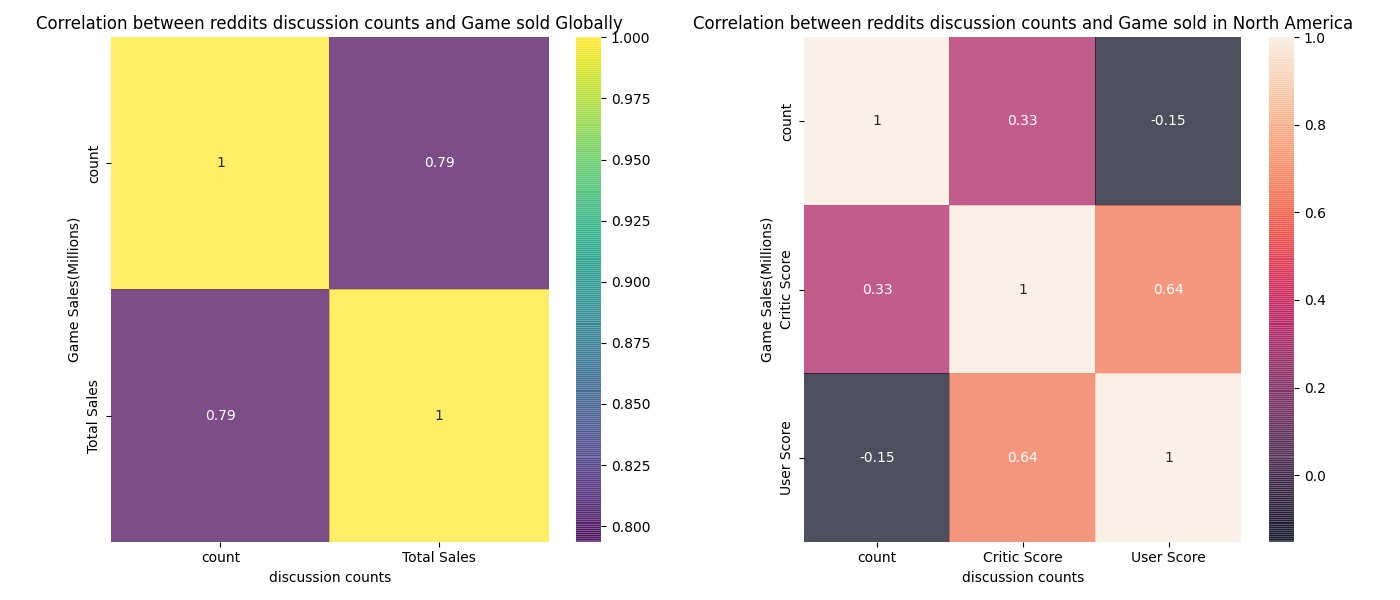

In [6]:
from IPython.display import Image
Image(filename='../../img/correlation.jpeg')

To explore the correlation between game sales and Reddit counts, we aim to discern potential outliers—games that deviate from the expected pattern. Specifically, we are interested in identifying games with exceptionally high sales but a scarcity of Reddit posts, or conversely, games with substantial Reddit engagement but comparatively low sales. The typical expectation is a positive correlation, where higher game sales align with increased Reddit discussion activity.

Upon examining the graph below, it becomes evident that certain games, such as "Overwatch," "sneaker," and "warframe," boast elevated Reddit post counts but register lower sales. Conversely, games like "Tetris" and "Portal" exhibit robust sales figures but attract fewer Reddit posts. This analysis aids in pinpointing outliers and understanding the nuanced relationships between game sales and Reddit discussions.

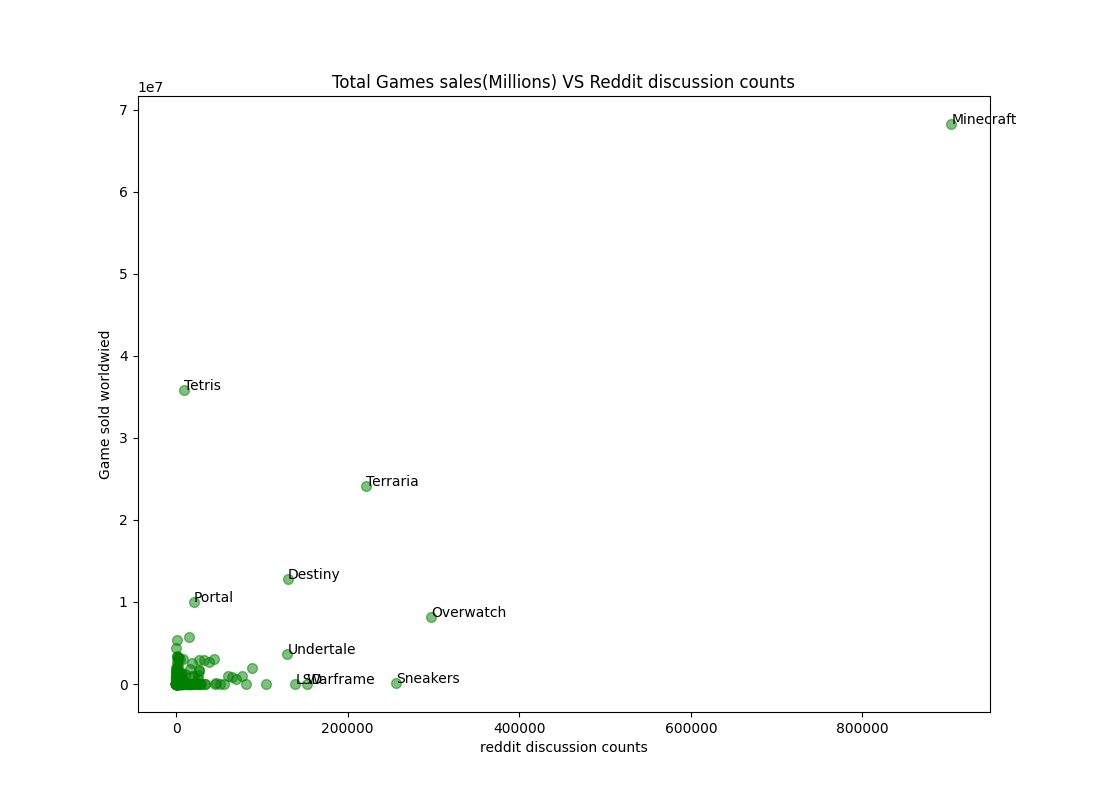

In [7]:
from IPython.display import Image
Image(filename='../../img/yixiang_game_sales1.jpeg')

### Regex Search
#### In this section, we focus on the Reddit text data of top-10 popular games filtered from the total subreddit data.

The data set we used in this part:

    "top_10_pop_games_text.csv" - text data related to the top-10 popular games.

This data is generated from the file "project_starter_script.py". First of all, filter the subreddits as the 10 most discussed game by counting the number of related posted reddits. Then print the schema and select the relevent subset of columns according to the schema.

In [10]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk.download('stopwords')

df=pd.read_csv("../../data/csv/top_10_pop_games_text.csv")
df.head()

,subreddit,author,title,selftext,num_comments,score,created_utc,year,month
0,FIFA,Robert-Fulton,if you every get bored...try 4 🌟,NaN,12,0,2023-02-22 21:07:53,2023,2
1,Minecraft,Dogeisagod,Texting a house,So I’m building a Minecraft house and I want t...,3,1,2023-02-22 21:08:06,2023,2
2,VALORANT,Status_Bet_8034,Killjoy Mains,Got bored and so decided to make this gif abou...,2,2,2023-02-22 21:08:12,2023,2
3,Minecraft,Age_Natural,Trident skeleton farm... I had heard it was ne...,NaN,3,3,2023-02-22 21:08:13,2023,2
4,pokemon,OneWhoGetsBread,the PokemonTogether campaign,"So several days ago, The Pokemon Company put o...",0,6,2023-02-22 21:08:56,2023,2


#### Most frequent words
This section is designed to showcase the most frequently used words in the text. To present relevant content, we'll exclude non-word and non-whitespace characters, filter out stopwords, and eliminate alphabetical letters.

First of all, display the 10 most frequent words.

In [18]:
def find_most_common_words(text_column, n=5):
    # Preprocess the text (remove any character that is not a word character or a whitespace character and convert to lowercase)
    text_column = text_column.str.lower().str.replace(r'[^\w\s]', '', regex=True)

    # Tokenize the text into words
    words = ' '.join(text_column).split()

    # Remove common stopwords and alphabet letters
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 2]

    # Count word frequencies
    word_counts = Counter(words)

    # Find the n most common words
    most_common_words = word_counts.most_common(n)
    return most_common_words

# Call the function with your DataFrame
most_common_words = find_most_common_words(df['title'], n=10)

# Print the 10 most common words and their frequencies
for word, count in most_common_words:
    print(f"{word}: {count}")

game: 213
xbox: 192
new: 170
help: 163
get: 157
one: 137
like: 133
minecraft: 132
anyone: 128
first: 117


Then create a wordcloud to visualize the frequent words

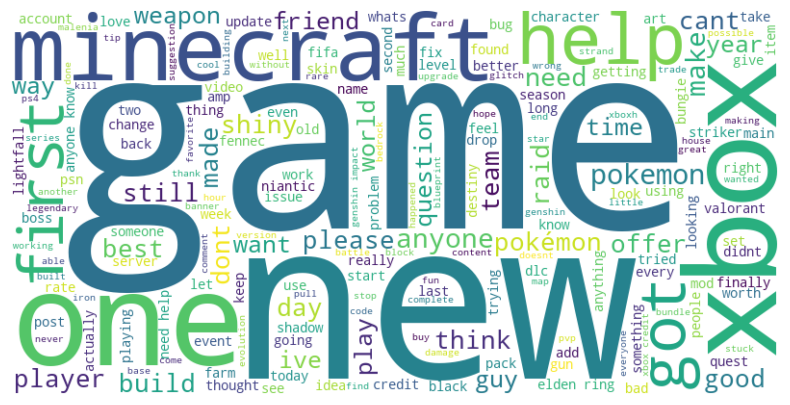

In [28]:
def most_common_words_use(text_column):
    # Preprocess the text (remove punctuation and convert to lowercase)
    text_column = text_column.str.lower().str.replace(r'[^\w\s]', '', regex=True)

    # Tokenize the text into words
    words = ' '.join(text_column).split()

    # Remove common stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 2]

    filtered_text = ' '.join(words)
    return filtered_text

# Call the function with the DataFrame
most_common_words = most_common_words_use(df['title'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(most_common_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It's evident that words such as "game," "new," "help," "first," and "Xbox" appear frequently. Moreover, the game "Minecraft" stands out prominently in the dataset. Consequently, we've chosen to highlight the common words associated with the game by filtering the subreddit as "Minecraft" and generating a word cloud.

In [21]:
# filter to the Minecraft
df_mine=df[df['subreddit']=='Minecraft']

# Call the function with your DataFrame
most_common_words = find_most_common_words(df_mine['title'], n=10)

# Print the 10 most common words and their frequencies
for word, count in most_common_words:
    print(f"{word}: {count}")

minecraft: 131
world: 40
help: 40
new: 32
found: 30
make: 30
made: 29
one: 25
bedrock: 23
farm: 22


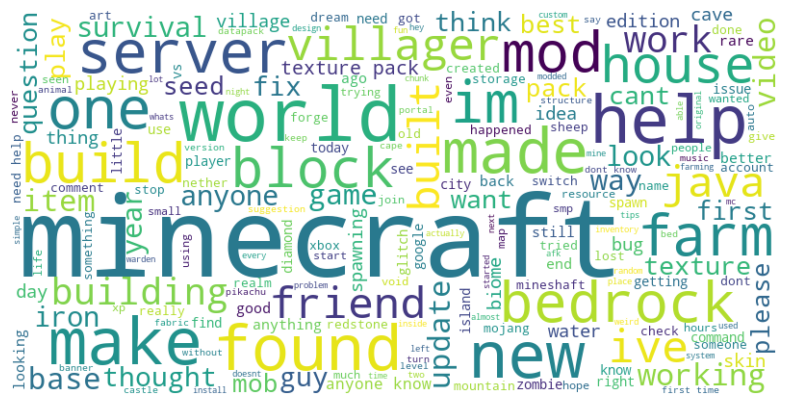

In [20]:
# filter to the Minecraft
df_mine=df[df['subreddit']=='Minecraft']

# Call the function with the DataFrame
most_common_words = most_common_words_use(df_mine['title'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(most_common_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The word cloud reveals the frequent occurrence of terms such as "build," "world," "block," "made," "house," and "help."

### Create Dummy Variables
This section aims to generate dummy variables relevant to our topic and business questions.

First of all, we identify key words associated with games based on frequently occurring terms including "friend," "help," and "team."

In [32]:
keywords = ["friend", "help", "team"]

df_games=df.copy()

# Create dummy variables for the presence of keywords
for keyword in keywords:
    df_games[keyword + '_dummy'] = df_games['title'].str.contains(keyword, case=False, regex=True).astype(int)

df_games.filter(regex='_dummy').head(5)

,friend_dummy,help_dummy,team_dummy
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


Subsequently, in order to address the question of identifying the best-selling games, we have chosen specific games based on the prevalent words, which include "Minecraft," "Eldenring," "Genshin_Impact," "pokemongo," "RocketLeagueExchange," "VALORANT," "DestinyTheGame," "CallOfDutyMobile," "FIFA," and "pokemon."

In [33]:
# Define keywords of interest
keywords = ["Minecraft", "Eldenring","Genshin_Impact","pokemongo","RocketLeagueExchange","VALORANT","DestinyTheGame","CallOfDutyMobile","FIFA","pokemon"]

df_bestselling=df.copy()

# Create dummy variables for the presence of keywords
for keyword in keywords:
    df_bestselling[keyword + '_dummy'] = df_bestselling['title'].str.contains(keyword, case=False, regex=True).astype(int)

df_bestselling.filter(regex='_dummy').head(5)

,Minecraft_dummy,Eldenring_dummy,Genshin_Impact_dummy,pokemongo_dummy,RocketLeagueExchange_dummy,VALORANT_dummy,DestinyTheGame_dummy,CallOfDutyMobile_dummy,FIFA_dummy,pokemon_dummy
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


Regarding to the question related to the popularity over months and the question related to sentiment analysis, we choose the words including "day","week","month", and "like", "favorite", "worth", "best", "never"

In [34]:
# Define keywords of interest
keywords = ["day", "week", "month", "like", "favorite", "worth", "best", "never"]

df_month_sentiment=df.copy()

# Create dummy variables for the presence of keywords
for keyword in keywords:
    df_month_sentiment[keyword + '_dummy'] = df_month_sentiment['title'].str.contains(keyword, case=False, regex=True).astype(int)

df_month_sentiment.filter(regex='_dummy').head(5)

,day_dummy,week_dummy,month_dummy,like_dummy,favorite_dummy,worth_dummy,best_dummy,never_dummy
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0


Further analysis will be done in the next assignment on NLP part